In [3]:
import warnings
import pandas as pd
import numpy as np
import missingno as msno


# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [4]:
#Para una buena exploracion de datos lo primero debemos observar el Dataframe para entender que contiene:
#sacamos el head para tener una idea de que datos tenemos

movie = pd.read_csv('data/clean_movies.csv')
movie.head()

,belongs_to_collection,genres,original_language,overview,popularity,production_companies,release_date,revenue,spoken_languages,title,vote_average,vote_count,release_year,return,cast,director
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],1995-10-30,373554033.0,['English'],Toy Story,7.7,5415.0,1995,12.451801,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,Grumpy Old Men Collection,"['Romance', 'Comedy']",en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",1995-12-22,0.0,['English'],Grumpier Old Men,6.5,92.0,1995,0.000000,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
2,Father of the Bride Collection,['Comedy'],en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",1995-02-10,76578911.0,['English'],Father of the Bride Part II,5.7,173.0,1995,0.000000,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer
3,James Bond Collection,"['Adventure', 'Action', 'Thriller']",en,James Bond must unmask the mysterious head of ...,14.686036,"['United Artists', 'Eon Productions']",1995-11-16,352194034.0,"['English', 'Pусский', 'Español']",GoldenEye,6.6,1194.0,1995,6.072311,"['Pierce Brosnan', 'Sean Bean', 'Izabella Scor...",Martin Campbell
4,Balto Collection,"['Family', 'Animation', 'Adventure']",en,An outcast half-wolf risks his life to prevent...,12.140733,"['Universal Pictures', 'Amblin Entertainment',...",1995-12-22,11348324.0,['English'],Balto,7.1,423.0,1995,0.000000,"['Kevin Bacon', 'Bob Hoskins', 'Bridget Fonda'...",Simon Wells


In [5]:
#extraemos info sobre los tipos de datos 
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4497 entries, 0 to 4496
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   genres                 4497 non-null   object 
 2   original_language      4497 non-null   object 
 3   overview               4438 non-null   object 
 4   popularity             4497 non-null   float64
 5   production_companies   4497 non-null   object 
 6   release_date           4497 non-null   object 
 7   revenue                4497 non-null   float64
 8   spoken_languages       4497 non-null   object 
 9   title                  4497 non-null   object 
 10  vote_average           4497 non-null   float64
 11  vote_count             4497 non-null   float64
 12  release_year           4497 non-null   int64  
 13  return                 4497 non-null   float64
 14  cast                   4497 non-null   object 
 15  dire

In [6]:
'''Las columnas que me parecen ser relevantes para la creacion del modelo de recomendacion
podrian ser:
TITLE
GENRES
POPULARITY
PRODUCTION COMPANIES
DIRECTOR
VOTE AVERAGE
ORIGINAL LANGUAGE'''

'Las columnas que me parecen ser relevantes para la creacion del modelo de recomendacion\npodrian ser:\nTITLE\nGENRES\nPOPULARITY\nPRODUCTION COMPANIES\nDIRECTOR\nVOTE AVERAGE\nORIGINAL LANGUAGE'

In [7]:
#etsadistica descriptiva de los datos (excludo el ano porque no me importa en este contexto)
describe_excluding_year = movie.drop('release_year', axis=1).describe()
print(describe_excluding_year)


        popularity       revenue  vote_average    vote_count        return
count  4497.000000  4.497000e+03   4497.000000   4497.000000  4.497000e+03
mean      6.235003  5.456746e+07      5.876540    409.503891  2.327208e+02
std      13.274715  1.640858e+08      1.309454   1118.372571  1.519100e+04
min       0.000001  0.000000e+00      0.000000      0.000000  0.000000e+00
25%       1.252133  0.000000e+00      5.300000     11.000000  0.000000e+00
50%       3.678782  0.000000e+00      6.100000     36.000000  0.000000e+00
75%       8.354488  1.628367e+07      6.700000    213.000000  8.424851e-01
max     547.488298  2.787965e+09     10.000000  12269.000000  1.018619e+06


In [8]:
#contamos los valores duplicados
movie.duplicated().sum()
duplicated_rows = movie[movie.duplicated()]


In [9]:
#elimino los duplicados (de la columna title)
movie.drop_duplicates(subset=['title'],keep='first', inplace=True)


In [10]:
'''Empezamos con la fase de visualizacion para ver valores faltantes, outliers, y relaciones interesantes entre los datos
Me ayudo con Datawrangler y autoviz para comprobar los pasajes'''

'Empezamos con la fase de visualizacion para ver valores faltantes, outliers, y relaciones interesantes entre los datos\nMe ayudo con Datawrangler y autoviz para comprobar los pasajes'

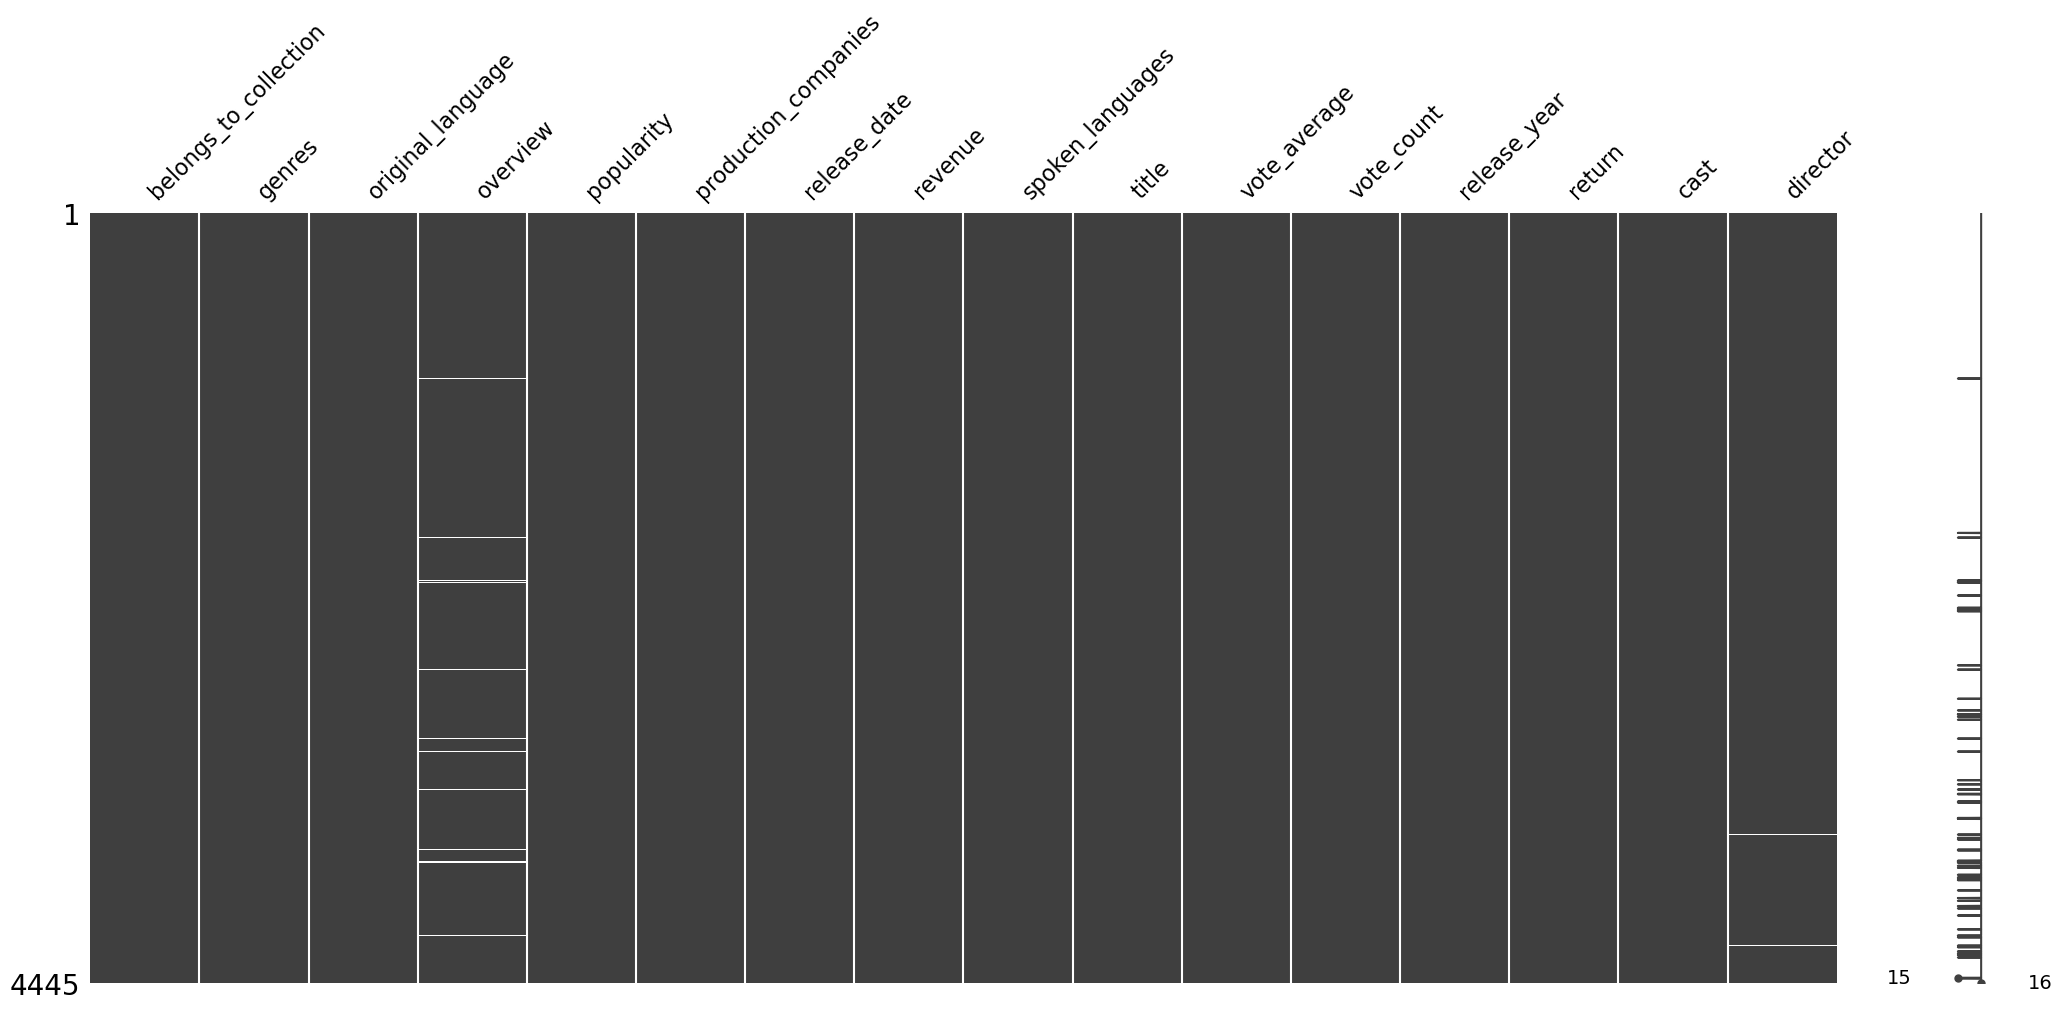

In [11]:

#missing values 
msno.matrix(movie)
plt.show()
#podemos ver que hay bastantes valores faltantes en el overview y en director, mientras que en las demas categorias no

In [12]:
movie['overview'].fillna('', inplace=True)

C:\Users\giada\AppData\Local\Temp\ipykernel_33596\1798542447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie['overview'].fillna('', inplace=True)


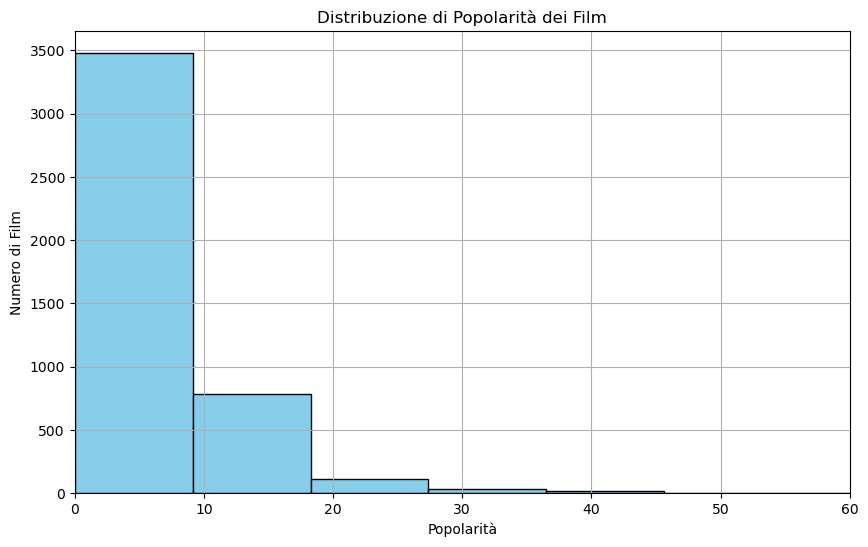

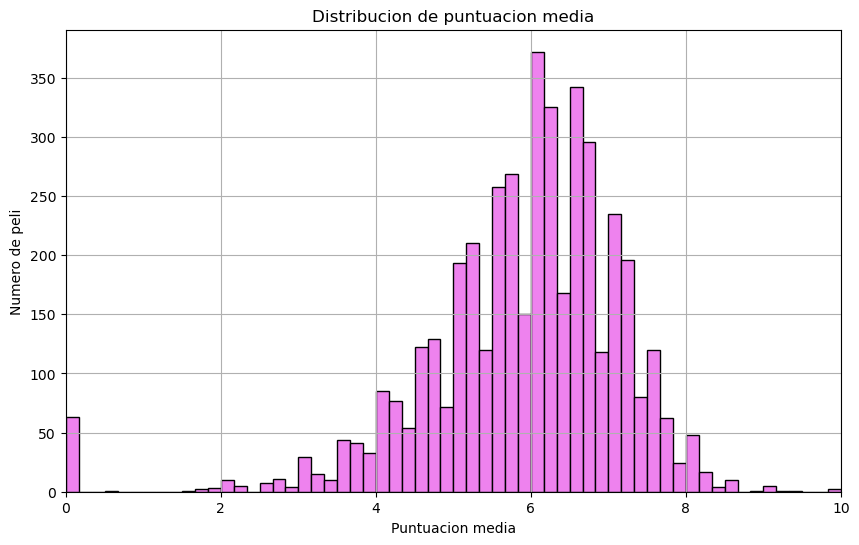

In [13]:
#histogramas para popularidad
plt.figure(figsize=(10, 6))
movie['popularity'].hist(bins=60, color='skyblue', edgecolor='black')
plt.title('Distribuzione di Popolarità dei Film')
plt.xlabel('Popolarità')
plt.ylabel('Numero di Film')
plt.xlim(0, 60)  # Imposta i limiti da 0 a 25 sull'asse x
plt.grid(True)
plt.show()

#ya podemos apreciar que hai un valor muy raro de popularidad

#histograma para puntuacion media
plt.figure(figsize=(10, 6))
movie['vote_average'].hist(bins=60, color='violet', edgecolor='black')
plt.title('Distribucion de puntuacion media')
plt.xlabel('Puntuacion media')
plt.ylabel('Numero de peli')
plt.xlim(0, 10)  # Imposta i limiti da 0 a 25 sull'asse x
plt.grid(True)
plt.show()


c:\Users\giada\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


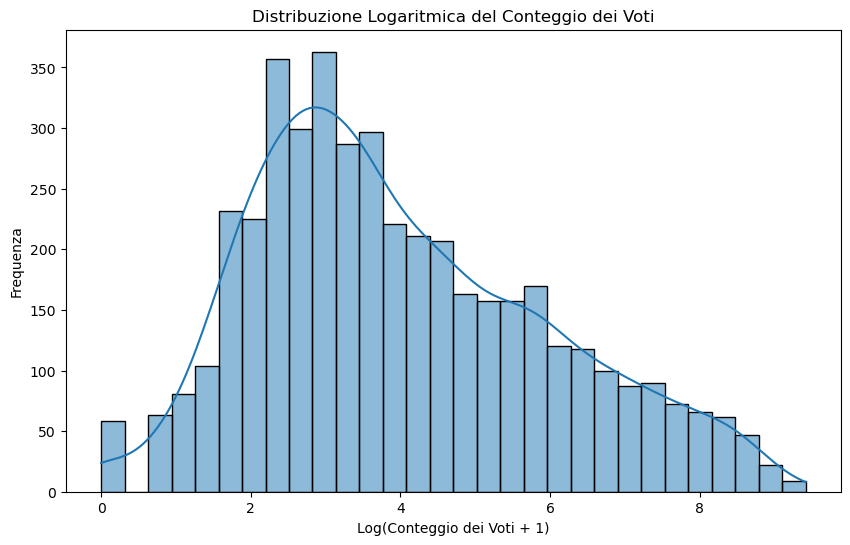

c:\Users\giada\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


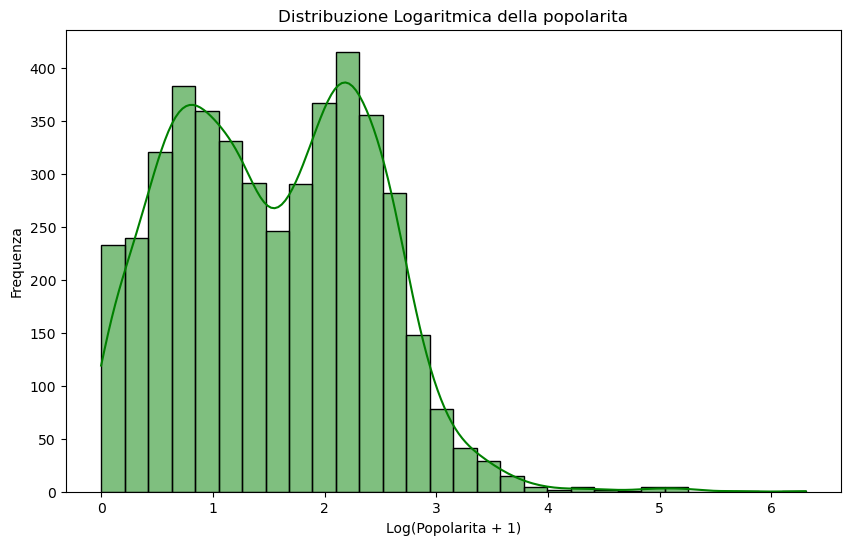

In [14]:
#Applicando una log-trasformazione possiamo ridurre la distorsione e visualizzare meglio la distribuzione
movie['log_vote_count'] = np.log1p(movie['vote_count'])
movie['log_popularity'] = np.log1p(movie['popularity'])


# Creare un istogramma per la variabile logaritmica 'log_vote_count'
plt.figure(figsize=(10, 6))
sns.histplot(movie['log_vote_count'], kde=True, bins=30)
plt.title('Distribuzione Logaritmica del Conteggio dei Voti')
plt.xlabel('Log(Conteggio dei Voti + 1)')
plt.ylabel('Frequenza')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(movie['log_popularity'], kde=True, bins=30, color='green')
plt.title('Distribuzione Logaritmica della popolarita')
plt.xlabel('Log(Popolarita + 1)')
plt.ylabel('Frequenza')
plt.show()

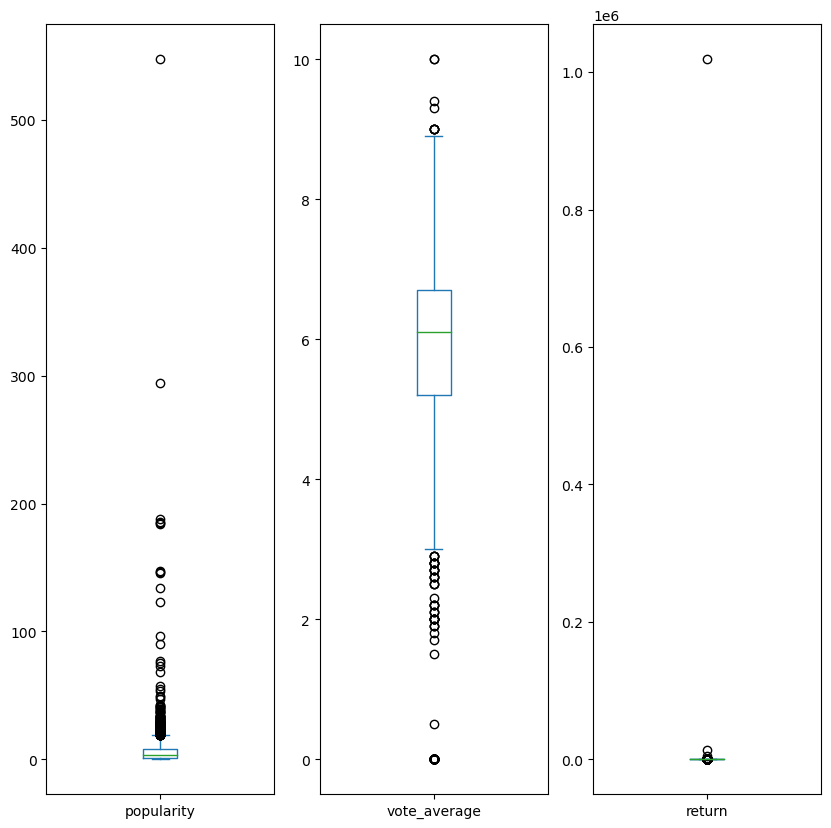

In [15]:
#box plots per identificare outliers
movie[['popularity', 'vote_average', 'return']].plot(kind='box', subplots=True, layout=(1,3), figsize=(10, 10))
plt.show()

In [16]:
from collections import Counter


all_genres = [genre for sublist in movie['genres'] for genre in sublist]

# Contare la frequenza di ciascun genere
genre_counts = dict(Counter(all_genres))
print("\nConteggio dei generi:")
print(genre_counts)

# Creare un DataFrame per le frequenze dei generi
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genres', 'Count'])

# Ordinare i generi per frequenza
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)



Conteggio dei generi:
{'[': 4445, "'": 21942, 'A': 2962, 'n': 5985, 'i': 7108, 'm': 4858, 'a': 4898, 't': 4733, 'o': 6550, ',': 6593, ' ': 7355, 'C': 2132, 'e': 7307, 'd': 2518, 'y': 3645, 'F': 1979, 'l': 2544, ']': 4445, 'R': 316, 'c': 3917, 'v': 1042, 'u': 1137, 'r': 7445, 'T': 1031, 'h': 921, 's': 1098, 'D': 1118, 'S': 652, 'H': 868, 'M': 515, 'W': 160, 'g': 84, 'V': 110}


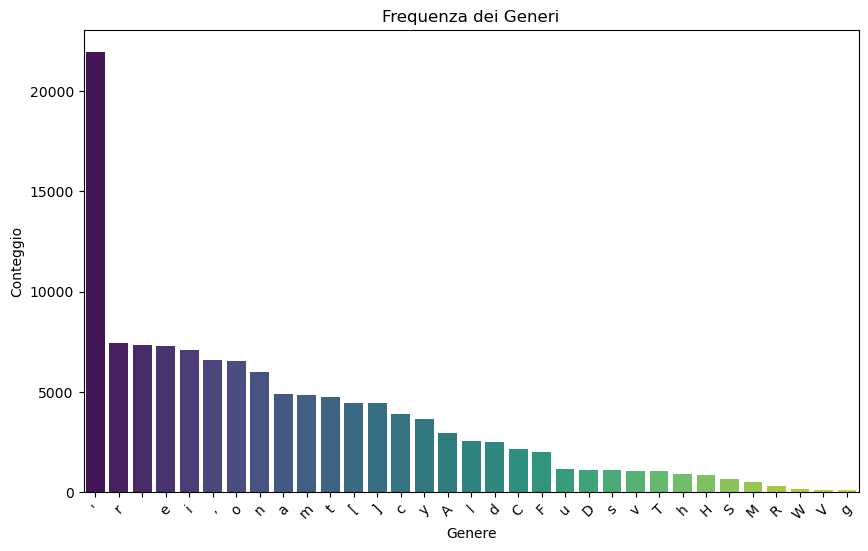

In [17]:
# Visualizzazione con Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='Genres', y='Count', data=genre_counts_df, palette='viridis')
plt.title('Frequenza dei Generi')
plt.xlabel('Genere')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

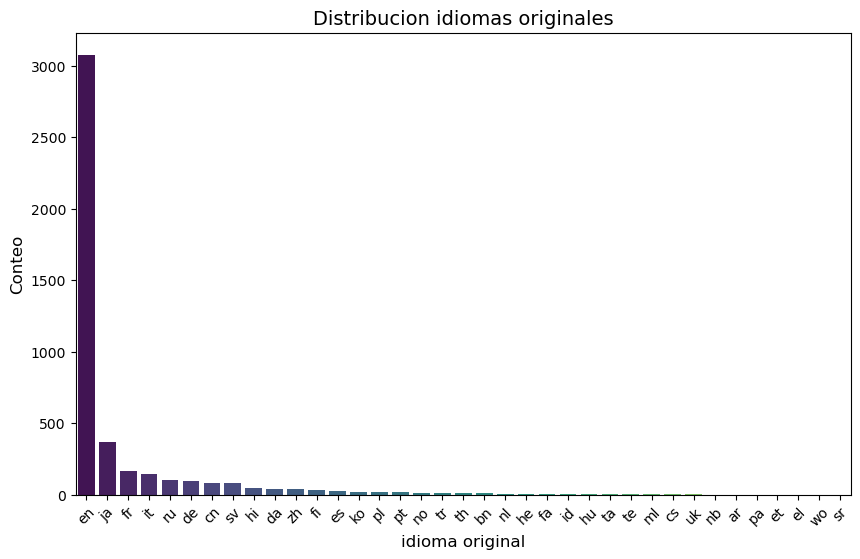

In [18]:
# Conteggio delle lingue originali
language_counts = movie['original_language'].value_counts()

# Plot a barre per le lingue originali
plt.figure(figsize=(10, 6))
sns.countplot(data=movie, x='original_language', order=language_counts.index, palette='viridis')
plt.title('Distribucion idiomas originales', fontsize=14)
plt.xlabel('idioma original', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.xticks(rotation=45)
plt.show()

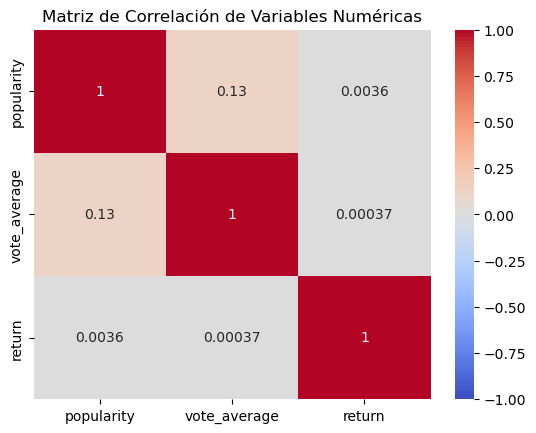

In [19]:
#Las matrices de correlación nos ayudan a identificar cómo de fuerte es la relación entre varias variables numéricas.
numerical_columns=['popularity', 'vote_average', 'return']

# Calculamos la matriz de correlación
correlation_matrix = movie[numerical_columns].corr()

# Creamos un heatmap para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

#entiendo que el return no tiene casi nada que ver con la popularidad y el conteo medio

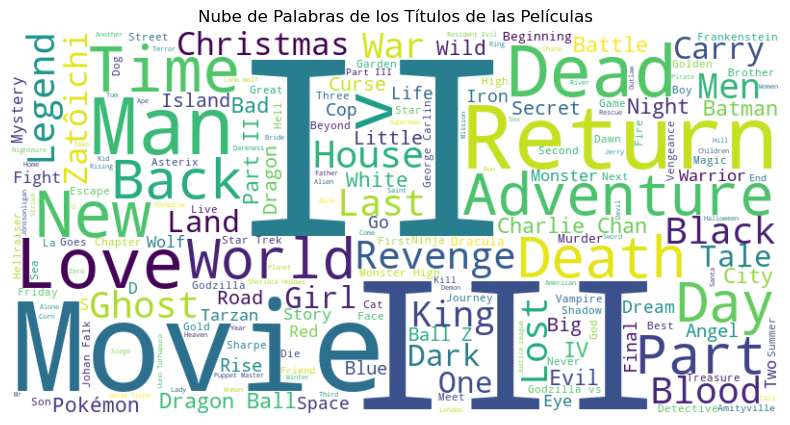

In [20]:
# Combinamos todos los títulos en una sola cadena de texto
text = ' '.join(movie['title'])

# Generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualizamos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos de las Películas')
plt.show()

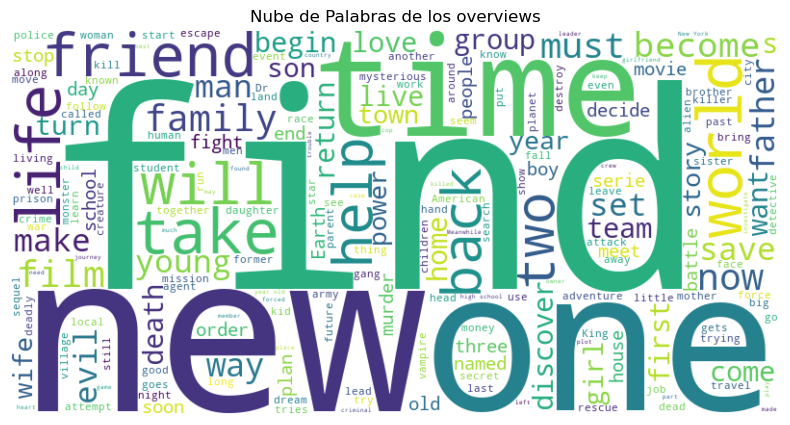

In [21]:
# Combinamos todos los generos en una sola cadena de texto
text = ' '.join(movie['overview'])

# Generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualizamos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los overviews')
plt.show()

In [22]:
#en director habia valores nulos. Los elimino 
movie = movie.dropna(subset='director')
movie['director'].isnull().sum()


0

In [23]:
movie.dtypes

belongs_to_collection     object
genres                    object
original_language         object
overview                  object
popularity               float64
production_companies      object
release_date              object
revenue                  float64
spoken_languages          object
title                     object
vote_average             float64
vote_count               float64
release_year               int64
return                   float64
cast                      object
director                  object
log_vote_count           float64
log_popularity           float64
dtype: object

In [24]:
# Definire i bound superiori e inferiori per cappare gli outliers (sostituire i valori oltre i limiti, con i limiti superiore e inferiore)
upper_bound = 18.94
lower_bound = -9.37

# Applicare il capping agli outliers
movie['popularity'] = np.where(movie['popularity'] > upper_bound, upper_bound,
                               np.where(movie['popularity'] < lower_bound, lower_bound, movie['popularity']))


In [25]:
'''from sklearn.preprocessing import MinMaxScaler

# Creiamo una copia del DataFrame per la normalizzazione
movie_normalized = movie.copy()

# Colonne numeriche da normalizzare
numeric_columns = ['popularity', 'vote_average', 'return']

# Inizializziamo il MinMaxScaler
scaler_minmax = MinMaxScaler()

# Applichiamo la scalatura Min-Max alle colonne numeriche
movie_normalized[numeric_columns] = scaler_minmax.fit_transform(movie[numeric_columns])'''

"from sklearn.preprocessing import MinMaxScaler\n\n# Creiamo una copia del DataFrame per la normalizzazione\nmovie_normalized = movie.copy()\n\n# Colonne numeriche da normalizzare\nnumeric_columns = ['popularity', 'vote_average', 'return']\n\n# Inizializziamo il MinMaxScaler\nscaler_minmax = MinMaxScaler()\n\n# Applichiamo la scalatura Min-Max alle colonne numeriche\nmovie_normalized[numeric_columns] = scaler_minmax.fit_transform(movie[numeric_columns])"

In [26]:
movie['director'].fillna('', inplace=True)

C:\Users\giada\AppData\Local\Temp\ipykernel_33596\2768399965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie['director'].fillna('', inplace=True)


In [27]:
print(movie['director'].isnull().sum())

0


In [28]:
print(movie['director'].apply(lambda x: isinstance(x, str)).sum())

4429


In [31]:
movie_rec = movie[['title', 'genres', 'overview', 'director', 'production_companies']]

movie_rec.isna().sum()

title                   0
genres                  0
overview                0
director                0
production_companies    0
dtype: int64

In [32]:
movie_rec.to_csv('movie_rec.csv', encoding= 'utf-8', index=False)